In [5]:
import os, glob
current_location = os.getcwd()
os.chdir(current_location)

import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

## Problem-1-1

In [9]:
data1 = pd.read_csv("airline_costs.csv", header = None)
cols = ["Airline", "Length", "Speed", "FlightTime", "Population", 
        "Cost","Revenue","Load", "Capacity", "TotalAssets", 
        "Fund","AdjustedAssets"]
data1.columns = cols
data1.head()

,Airline,Length,Speed,FlightTime,Population,Cost,Revenue,Load,Capacity,TotalAssets,Fund,AdjustedAssets
0,All American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


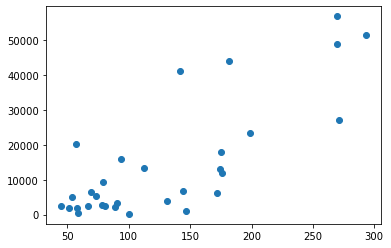

In [10]:
plt.scatter(data1.Length, data1.Population)

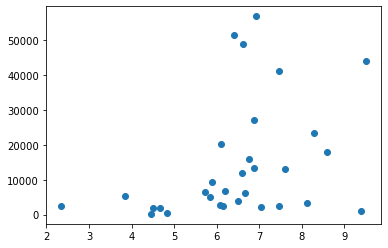

In [11]:
#Scatter plot of flight time and population
plt.scatter(data1.FlightTime, data1.Population)

In [12]:
# Create linear regression object
regr = linear_model.LinearRegression()

x_train = data1[["Length", "FlightTime"]]
y_train = data1[["Population"]]
# Train the model using the training sets
regr.fit(x_train, y_train)

print("intercept:", regr.intercept_, "\ncoef:", regr.coef_)
print("prediction:", regr.predict([[200,7.2]]))

intercept: [-7792.07064806] 
coef: [[ 183.29555165 -213.33403675]]
prediction: [[27331.03461682]]


In [13]:
#Creating the linear model and printing it's summary
lr_model = smf.ols(formula = 'Population ~ Length+FlightTime', data = data1).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     23.00
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.23e-06
Time:                        00:26:28   Log-Likelihood:                -330.06
No. Observations:                  31   AIC:                             666.1
Df Residuals:                      28   BIC:                             670.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7792.0706   8396.998     -0.928      0.361    -2.5e+04    9408.401
Length       183.2956     30.414      6.027      0.000     120.995     245.596
FlightTime  -213.3340   1436.955     -0.148      0.883   -3156.803    2730.134
==============================================================================
Omnibus:                        2.469   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.851
Skew:                           0.598   Prob(JB):                        0.396
Kurtosis:                       2.931   Cond. No.                         653.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Problem-1-2

In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

x_train = data1[["Population"]]
y_train = data1[["TotalAssets"]]
# Train the model using the training sets
regr.fit(x_train, y_train)

print("intercept:", regr.intercept_, "\ncoef:", regr.coef_)
print("prediction:", regr.predict([[20300]]))

intercept: [-98.50798581] 
coef: [[0.02165468]]
prediction: [[341.08205955]]


In [15]:
#Creating the linear model and printing it's summary
lr_model2 = smf.ols(formula = 'TotalAssets ~ Population', data = data1).fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalAssets   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.85e-12
Time:                        00:27:31   Log-Likelihood:                -202.95
No. Observations:                  31   AIC:                             409.9
Df Residuals:                      29   BIC:                             412.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -98.5080     41.633     -2.366      0.025    -183.656     -13.360
Population     0.0217      0.002     11.442      0.000       0.018       0.026
==============================================================================
Omnibus:                       18.279   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.501
Skew:                          -1.486   Prob(JB):                     4.78e-06
Kurtosis:                       6.183   Cond. No.                     2.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Problem-2

In [19]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn import preprocessing

nasal = pd.read_excel('kangaroo.xls')
# nasal

X = nasal.X
X = sm.add_constant(X) # Adds constant/intercept term
y = nasal.Y

# print(X)

lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())


def grad_descent(X, y, alpha, epsilon):
    # print(X)
    iteration = [0]
    i = 0
    theta = np.ones(shape=(len(nasal.columns), 1))

    X = X + np.array([1,0])

    cost = [np.transpose(X @ theta - y) @ (X @ theta - y)]
    delta = 1
    while (delta>epsilon):
        
        theta = theta - alpha*((np.transpose(X)) @ (X @ theta - y))
        cost_val = (np.transpose(X @ theta - y)) @ (X @ theta - y)
        cost.append(cost_val)
        # print(cost_val)
        # print(cost[i+1])
        delta = abs(cost[i+1]-cost[i])
        if ((cost[i+1]-cost[i]) > 0):
            print("The cost is increasing. Try reducing alpha.")
            break
        iteration.append(i)
        i += 1
        
    print("Completed in %d iterations." %(i))
    return(theta, cost)

# X = pd.concat((pd.DataFrame([1]*len(nasal)), nasal.X),axis=1, join='outer').to_numpy()
y = y.to_numpy()

y = np.expand_dims(y, axis=1)

# print(X)

theta, cost = grad_descent(X = preprocessing.scale(X), y=y, alpha=0.0001, epsilon = 10**-10)



print (theta)

*** No CODEPAGE record, no encoding_override: will use 'ascii'
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     149.7
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.34e-15
Time:                        00:31:20   Log-Likelihood:                -182.98
No. Observations:                  45   AIC:                             370.0
Df Residuals:                      43   BIC:                             373.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------



y = m0*1 + mx
y = m0*1 + m1x1 + ... + mdxd


y = transpose ([m0, m1, ..., md])  @ [1, x1, ..., xd]


[1, x1, ..., xd]
[1, x1, ..., xd]
[1, x1, ..., xd]
[1, x1, ..., xd]
[1, x1, ..., xd]
[1, x1, ..., xd]


x = [x0, x1, x2] 
mean(x)
std(x)
(x0 - mean(x))/(std(x))
